In [60]:
import os
import random
import numpy as np
import scipy.optimize as opt
import scipy.stats as stat
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from tqdm.notebook import tqdm
import seaborn as sns
sns.set(style="whitegrid", font="FreeSans")
import pyactup as pau

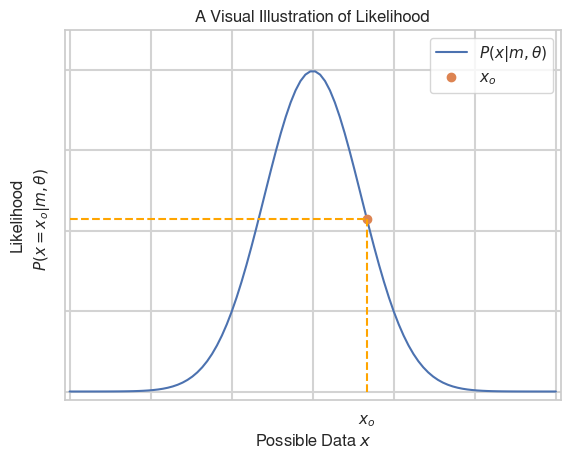

In [121]:
# Visualization of likelihood

gauss = stat.norm(0, 1)
x = np.linspace(-5, 5, 100)
y = gauss.pdf(x)
x_o = np.random.uniform(0.65, 1.5)
y_o = gauss.pdf(x_o)

# Visualize
fig = plt.figure()
ax = fig.add_subplot(111)

# Fake grid
for i in np.linspace(-5, 5, 7):
    ax.axvline(i, color='lightgrey')
for i in np.linspace(0, 0.4, 5):
    ax.axhline(i, color='lightgrey')
    
ax.plot(x, y, label=r"$P(x|m, \theta)$")
ax.plot(x_o, y_o, "o", label="$x_o$")
ax.legend()
ax.set_xlim(-5.1, 5.1)
ax.set_ylim(-0.01, 0.45)

ax.set_xlabel("Possible Data $x$")
ax.set_xticks([x_o])
ax.set_xticklabels(["$x_o$"])
ax.set_yticks([y_o])
ax.set_yticklabels([r"$P(x=x_o|m, \theta)$"], rotation=90, va="center")
ax.grid()
ax.set_ylabel("Likelihood")
ax.plot([-5, x_o], [y_o, y_o], "--", color="orange")
ax.plot([x_o, x_o], [0, y_o], "--", color="orange")
ax.set_title("A Visual Illustration of Likelihood")


plt.show()

Short example with exp

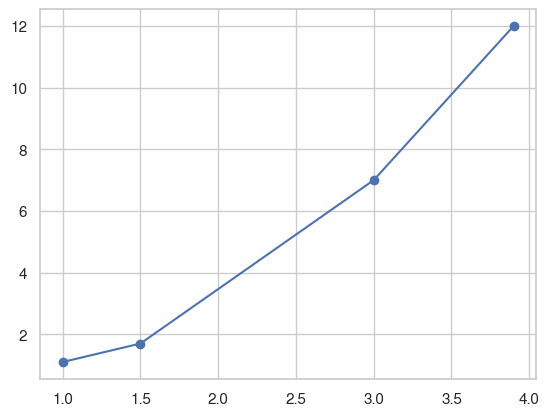

In [59]:
points = [(1, 1.1), (1.5, 1.7), (3, 7), (3.9, 12)]
xx = np.array([p[0] for p in points])
yy = np.array([p[1] for p in points])
plt.plot(xx, yy, "-o")
plt.show()

In [58]:
def rmse(scale, offset):
    yyp = scale * np.exp(xx - offset)
    return np.sum(yy - yyp)**2

def vrmse(params):
    scale, offset = params
    return rmse(scale, offset)

fit1 = opt.minimize(vrmse, x0 = (1,1), 
                   method = "Nelder-Mead")

scale1, offset1 = fit1.x
print(fit1)
print("a = %.3f, b = %.3f" % (scale1, offset1))


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 4.711983084849855e-13
             x: [ 8.703e-01  1.119e+00]
           nit: 34
          nfev: 65
 final_simplex: (array([[ 8.703e-01,  1.119e+00],
                       [ 8.702e-01,  1.119e+00],
                       [ 8.704e-01,  1.119e+00]]), array([ 4.712e-13,  1.530e-11,  3.066e-11]))
a = 0.870, b = 1.119


Now, we do the same for the liklihood function. (I am actually cheating a little; I have actually log-transformed the exponential function to get a linear function, so I can used RMSE like I would for a linear function).

In [56]:
def likelihood(scale, offset):
    lyy = np.log(yy)
    lyyp = scale*(xx - offset)
    return np.sum(lyy - lyyp)**2

def vlikelihood(params):
    scale, offset = params
    return mle(scale, offset)

fit2 = opt.minimize(vlikelihood, x0 = (1,1), 
                   method = "Nelder-Mead")
scale2, offset2 = fit2.x
print("a = %.3f, b = %.3f" % (scale2, offset2))

a = 0.979, b = 1.058


And now, a visual comparison

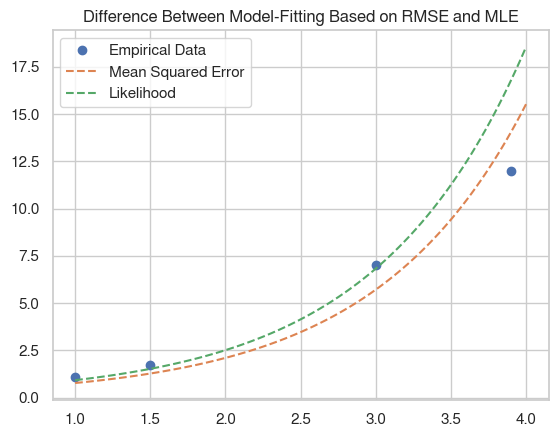

In [54]:
x = np.linspace(1, 4, 100)

y_rmse = scale1 * np.exp(x - offset1)
y_mle = scale2 * np.exp(x - offset2)

plt.plot(xx, yy, "o", label="Empirical Data")
plt.plot(x, y_rmse, "--", label="Mean Squared Error")
plt.plot(x, y_mle, "--", label="Likelihood")
plt.legend()
plt.title("Difference Between Model-Fitting Based on RMSE and MLE") 
plt.savefig("difference.png")

0.022161686638587755

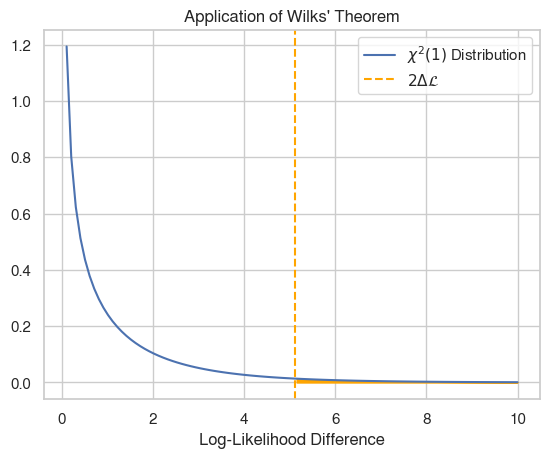

In [157]:
mychi = stat.chi2(1)
x = np.linspace(0, 10, 100)
l2 = 2.56 * 2
y = mychi.pdf(x)
plt.plot(x, y, label="$\chi^2(1)$ Distribution")
plt.axvline(x=l2, linestyle="--", label="$2\Delta \mathcal{L}$", color="orange")
plt.legend()
plt.xlabel("Log-Likelihood Difference")
plt.title("Application of Wilks' Theorem")
plt.fill_between(x[x>l2], y[x>l2], color="orange")
np.sum(y[x>l2])/10